# Notebook 

## Importação dos dados

In [64]:
import pandas as pd

In [65]:
df_eletric=pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
df_eletric.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,42,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,100,Female,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,36,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,94,Female,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,34,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [66]:
df_eletric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             20000 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [67]:
df_eletric.isna().sum()

Customer ID             0
Age                     0
Gender                  0
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

## Tratamento

Características principais:

- ID do cliente: identificador exclusivo para cada cliente.
- Idade: Idade do cliente (numérico)
- Sexo: Sexo do cliente (masculino ou feminino)
- Status de membro de fidelidade: (Sim/Não)
- Tipo de produto: Tipo de produto eletrônico vendido (por exemplo, smartphone, laptop, tablet)
- SKU: um código único para cada produto.
- Classificação: Classificação do cliente do produto (1-5 estrelas) (não deve ter classificações nulas)
- Status do pedido: Status do pedido (Concluído, Cancelado)
- Método de pagamento: Método usado para pagamento (por exemplo, dinheiro, cartão de crédito, PayPal)
- Preço total: Preço total da transação (numérico)
- Preço unitário: Preço por unidade do produto (numérico)
- Quantidade: Número de unidades compradas (numérico)
- Data de compra: Data da compra (formato: AAAA-MM-DD)
- Tipo de envio: Tipo de envio escolhido (por exemplo, Padrão, Overnight, Expresso)
- Complementos adquiridos: Lista de todos os itens adicionais adquiridos (por exemplo, acessórios, garantia estendida)
- Total de complementos: Preço total dos complementos adquiridos (numérico)

### tradução

o objetivo é traduzir as colunas para facilitar o entendimento

In [68]:
df_eletric.rename(columns={"Customer ID":"ID"},inplace=True)
df_eletric.rename(columns={"Age":"Idade"},inplace=True)
df_eletric.rename(columns={"Gender":"Gênero"},inplace=True)
df_eletric.rename(columns={"Loyalty Member":"Status de membro de fidelidade"},inplace=True)
df_eletric.rename(columns={"Product Type":"Tipo de produto"},inplace=True)
df_eletric.rename(columns={"SKU":"id_prod"},inplace=True)
df_eletric.rename(columns={"Rating":"Classificação"},inplace=True)
df_eletric.rename(columns={"Order Status":"status do pedido"},inplace=True)
df_eletric.rename(columns={"Payment Method":"Metodo de pagamento"},inplace=True)
df_eletric.rename(columns={"Total Price":"Preço total"},inplace=True)
df_eletric.rename(columns={"Unit Price":"Preço unitario"},inplace=True)
df_eletric.rename(columns={"Quantity":"Quantidade"},inplace=True)
df_eletric.rename(columns={"Purchase Date":"Data de compra"},inplace=True)
df_eletric.rename(columns={"Shipping Type":"Tipo de envio"},inplace=True)
df_eletric.rename(columns={"Add-ons Purchased":"complementos adquiridos"},inplace=True)
df_eletric.rename(columns={"Add-on Total ":"Total de complementos"},inplace=True)
df_eletric

,ID,Idade,Gênero,Status de membro de fidelidade,Tipo de produto,id_prod,Classificação,status do pedido,Metodo de pagamento,Preço total,Preço unitario,Quantidade,Data de compra,Tipo de envio,complementos adquiridos,Add-on Total
0,1000,42,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,100,Female,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,36,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,94,Female,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,34,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,75,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,75,Female,No,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,75,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,72,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


### Diversidade de valores em cada coluna 

Observar a diversidade de valores em cada coluna 'object' para decidir como iremos tratar os dados 

In [69]:
df_eletric['Gênero'].unique()

array(['Male', 'Female'], dtype=object)

In [70]:
df_eletric['Status de membro de fidelidade'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
df_eletric['Tipo de produto'].unique()

array(['Smartphone', 'Tablet', 'Laptop', 'Smartwatch', 'Headphones'],
      dtype=object)

In [72]:
df_eletric['status do pedido'].unique()

array(['Cancelled', 'Completed'], dtype=object)

In [73]:
df_eletric['Metodo de pagamento'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

In [74]:
df_eletric['Tipo de envio'].unique()

array(['Standard', 'Overnight', 'Express', 'Same Day', 'Expedited'],
      dtype=object)

In [75]:
df_eletric['id_prod'].unique()

array(['SKU1004', 'SKU1002', 'SKU1005', 'SKU1001', 'SKU1003', 'LTP123',
       'SMP234', 'TBL345', 'HDP456', 'SWT567'], dtype=object)

In [76]:

df_eletric['complementos adquiridos'].unique()

array(['Accessory,Accessory,Accessory', 'Impulse Item', nan,
       'Impulse Item,Impulse Item', 'Accessory', 'Impulse Item,Accessory',
       'Extended Warranty,Extended Warranty',
       'Impulse Item,Accessory,Impulse Item',
       'Accessory,Extended Warranty',
       'Extended Warranty,Impulse Item,Extended Warranty',
       'Accessory,Impulse Item,Accessory',
       'Impulse Item,Extended Warranty',
       'Impulse Item,Accessory,Extended Warranty',
       'Extended Warranty,Impulse Item', 'Accessory,Accessory',
       'Extended Warranty', 'Extended Warranty,Accessory',
       'Accessory,Extended Warranty,Extended Warranty',
       'Accessory,Impulse Item', 'Impulse Item,Impulse Item,Accessory',
       'Impulse Item,Extended Warranty,Impulse Item',
       'Extended Warranty,Accessory,Impulse Item',
       'Impulse Item,Accessory,Accessory',
       'Accessory,Impulse Item,Extended Warranty',
       'Accessory,Extended Warranty,Impulse Item',
       'Extended Warranty,Accessory,Ext

In [77]:
df_eletric['complementos adquiridos'].nunique()

75

### Conversão de dados para int

Algoritmos lidam melhor com números por isso resolvemos transcrever os valores para inteiros

In [78]:
df_eletric['Gênero'].replace({"Male":1, "Female":2},inplace=True)
df_eletric['Status de membro de fidelidade'].replace({"No":0,"Yes":1},inplace=True)
df_eletric['status do pedido'].replace({'Cancelled':0, 'Completed':2},inplace=True)
df_eletric['Tipo de produto'].replace({"Smartphone":1, "Tablet":2, "Laptop":3, "Smartwatch":4, "Headphones":5},inplace=True)
df_eletric['Metodo de pagamento'].replace({'Credit Card':1, 'Paypal':2, 'Cash':3, 'Debit Card':4, 'Bank Transfer':5,
       'PayPal':2},inplace=True)
df_eletric['Tipo de envio'].replace({'Standard':1, 'Overnight':2, 'Express':3, 'Same Day':4, 'Expedited':5},inplace=True)
df_eletric['id_prod'].replace({'SKU1004':1004, 'SKU1002':1002, 'SKU1005':1005, 'SKU1001':1001, 'SKU1003':1003, 'LTP123':123,
       'SMP234':234, 'TBL345':345, 'HDP456':456, 'SWT567':567},inplace=True)
df_eletric['Data de compra']=pd.to_datetime(df_eletric['Data de compra'])

In [79]:
df_eletric.describe().style.background_gradient(cmap='Oranges')


,ID,Idade,Gênero,Status de membro de fidelidade,Tipo de produto,id_prod,Classificação,status do pedido,Metodo de pagamento,Preço total,Preço unitario,Quantidade,Data de compra,Tipo de envio,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000
mean,10483.526550,59.369150,1.490300,0.246450,2.594800,674.341400,3.093950,1.343200,2.583950,3180.133419,578.631867,5.485550,2024-04-18 10:42:18.720000256,2.650850,62.244848
min,1000.000000,18.000000,1.000000,0.000000,1.000000,123.000000,1.000000,0.000000,1.000000,20.750000,20.750000,1.000000,2023-09-24 00:00:00,1.000000,0.000000
25%,5478.000000,39.000000,1.000000,0.000000,1.000000,345.000000,2.000000,0.000000,1.000000,1139.680000,361.180000,3.000000,2024-02-05 00:00:00,1.000000,7.615000
50%,10499.500000,60.000000,1.000000,0.000000,2.000000,784.000000,3.000000,2.000000,2.000000,2534.490000,463.960000,5.000000,2024-04-24 00:00:00,2.000000,51.700000
75%,15504.000000,80.000000,2.000000,0.000000,4.000000,1003.000000,4.000000,2.000000,4.000000,4639.600000,791.190000,8.000000,2024-07-08 00:00:00,4.000000,93.842500
max,19998.000000,100.000000,2.000000,1.000000,5.000000,1005.000000,5.000000,2.000000,5.000000,11396.800000,1139.680000,10.000000,2024-09-23 00:00:00,5.000000,292.770000
std,5631.732525,23.983318,0.499918,0.430954,1.354845,346.699822,1.223764,0.939286,1.445080,2544.978675,312.274076,2.870854,nan,1.486423,58.058431


In [80]:
df_eletric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              20000 non-null  int64         
 1   Idade                           20000 non-null  int64         
 2   Gênero                          20000 non-null  int64         
 3   Status de membro de fidelidade  20000 non-null  int64         
 4   Tipo de produto                 20000 non-null  int64         
 5   id_prod                         20000 non-null  int64         
 6   Classificação                   20000 non-null  int64         
 7   status do pedido                20000 non-null  int64         
 8   Metodo de pagamento             20000 non-null  int64         
 9   Preço total                     20000 non-null  float64       
 10  Preço unitario                  20000 non-null  float64       
 11  Qu

In [81]:
df_new=df_eletric.drop(['complementos adquiridos'],axis=1)
df_new

,ID,Idade,Gênero,Status de membro de fidelidade,Tipo de produto,id_prod,Classificação,status do pedido,Metodo de pagamento,Preço total,Preço unitario,Quantidade,Data de compra,Tipo de envio,Add-on Total
0,1000,42,1,0,1,1004,2,0,1,5538.33,791.19,7,2024-03-20,1,40.21
1,1000,100,2,0,2,1002,3,2,2,741.09,247.03,3,2024-04-20,2,26.09
2,1002,36,1,0,3,1005,3,2,1,1855.84,463.96,4,2023-10-17,3,0.00
3,1002,94,2,1,1,1004,2,2,3,3164.76,791.19,4,2024-08-09,2,60.16
4,1003,34,1,1,1,1001,5,2,3,41.50,20.75,2,2024-05-21,3,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,75,2,0,1,234,4,2,5,6838.08,1139.68,6,2024-06-15,5,0.00
19996,19996,75,2,0,3,123,4,0,1,2697.28,674.32,4,2024-07-18,1,0.00
19997,19996,75,2,0,5,456,4,2,5,1805.90,361.18,5,2024-08-26,1,198.98
19998,19997,72,1,0,5,456,1,0,5,2528.26,361.18,7,2024-01-06,5,101.34


In [82]:
corr=df_new.corr()
corr.style.background_gradient(cmap='Oranges')

,ID,Idade,Gênero,Status de membro de fidelidade,Tipo de produto,id_prod,Classificação,status do pedido,Metodo de pagamento,Preço total,Preço unitario,Quantidade,Data de compra,Tipo de envio,Add-on Total
ID,1.000000,-0.000900,-0.004268,-0.004918,0.265141,-0.839266,-0.076836,0.001435,0.055562,0.203207,0.297445,0.010464,0.241725,0.381944,0.317418
Idade,-0.000900,1.000000,-0.004529,0.002876,0.005199,0.003307,0.003311,0.011523,0.003507,0.006657,0.002473,0.011604,-0.010182,-0.005591,0.001679
Gênero,-0.004268,-0.004529,1.000000,0.001929,-0.006099,-0.002567,0.003656,0.011349,-0.007352,0.008087,0.007732,-0.000882,-0.008072,-0.008629,0.022821
Status de membro de fidelidade,-0.004918,0.002876,0.001929,1.000000,-0.008202,0.001521,0.003026,-0.006255,-0.004600,0.001251,0.003174,0.000353,0.000329,-0.004530,-0.004488
Tipo de produto,0.265141,0.005199,-0.006099,-0.008202,1.000000,-0.139129,-0.095530,0.003744,0.018652,-0.099404,-0.145182,0.006156,0.077618,0.129545,0.101663
id_prod,-0.839266,0.003307,-0.002567,0.001521,-0.139129,1.000000,0.076486,-0.003972,-0.062421,-0.304296,-0.443170,-0.012878,-0.253429,-0.406511,-0.341687
Classificação,-0.076836,0.003311,0.003656,0.003026,-0.095530,0.076486,1.000000,0.004182,-0.014257,-0.232429,-0.343829,-0.008587,-0.023261,-0.041149,-0.044338
status do pedido,0.001435,0.011523,0.011349,-0.006255,0.003744,-0.003972,0.004182,1.000000,0.009533,-0.003595,-0.003422,-0.001183,-0.003568,-0.005173,-0.000876
Metodo de pagamento,0.055562,0.003507,-0.007352,-0.004600,0.018652,-0.062421,-0.014257,0.009533,1.000000,0.024041,0.034853,0.005764,0.001387,0.030023,0.030398
Preço total,0.203207,0.006657,0.008087,0.001251,-0.099404,-0.304296,-0.232429,-0.003595,0.024041,1.000000,0.673951,0.653872,0.078865,0.107369,0.083924


In [83]:
# dropar valores duplicados
df_eletric.drop_duplicates(inplace=True)

# Valores faltantes com a média
df_eletric['Preço total'].fillna(df_eletric['Preço total'].median(), inplace=True)

# Preencha os valores ausentes para colunas categóricas com a moda
df_eletric['status do pedido'].fillna(df_eletric['status do pedido'].mode()[0], inplace=True)

In [84]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Visualzação

### Correlação

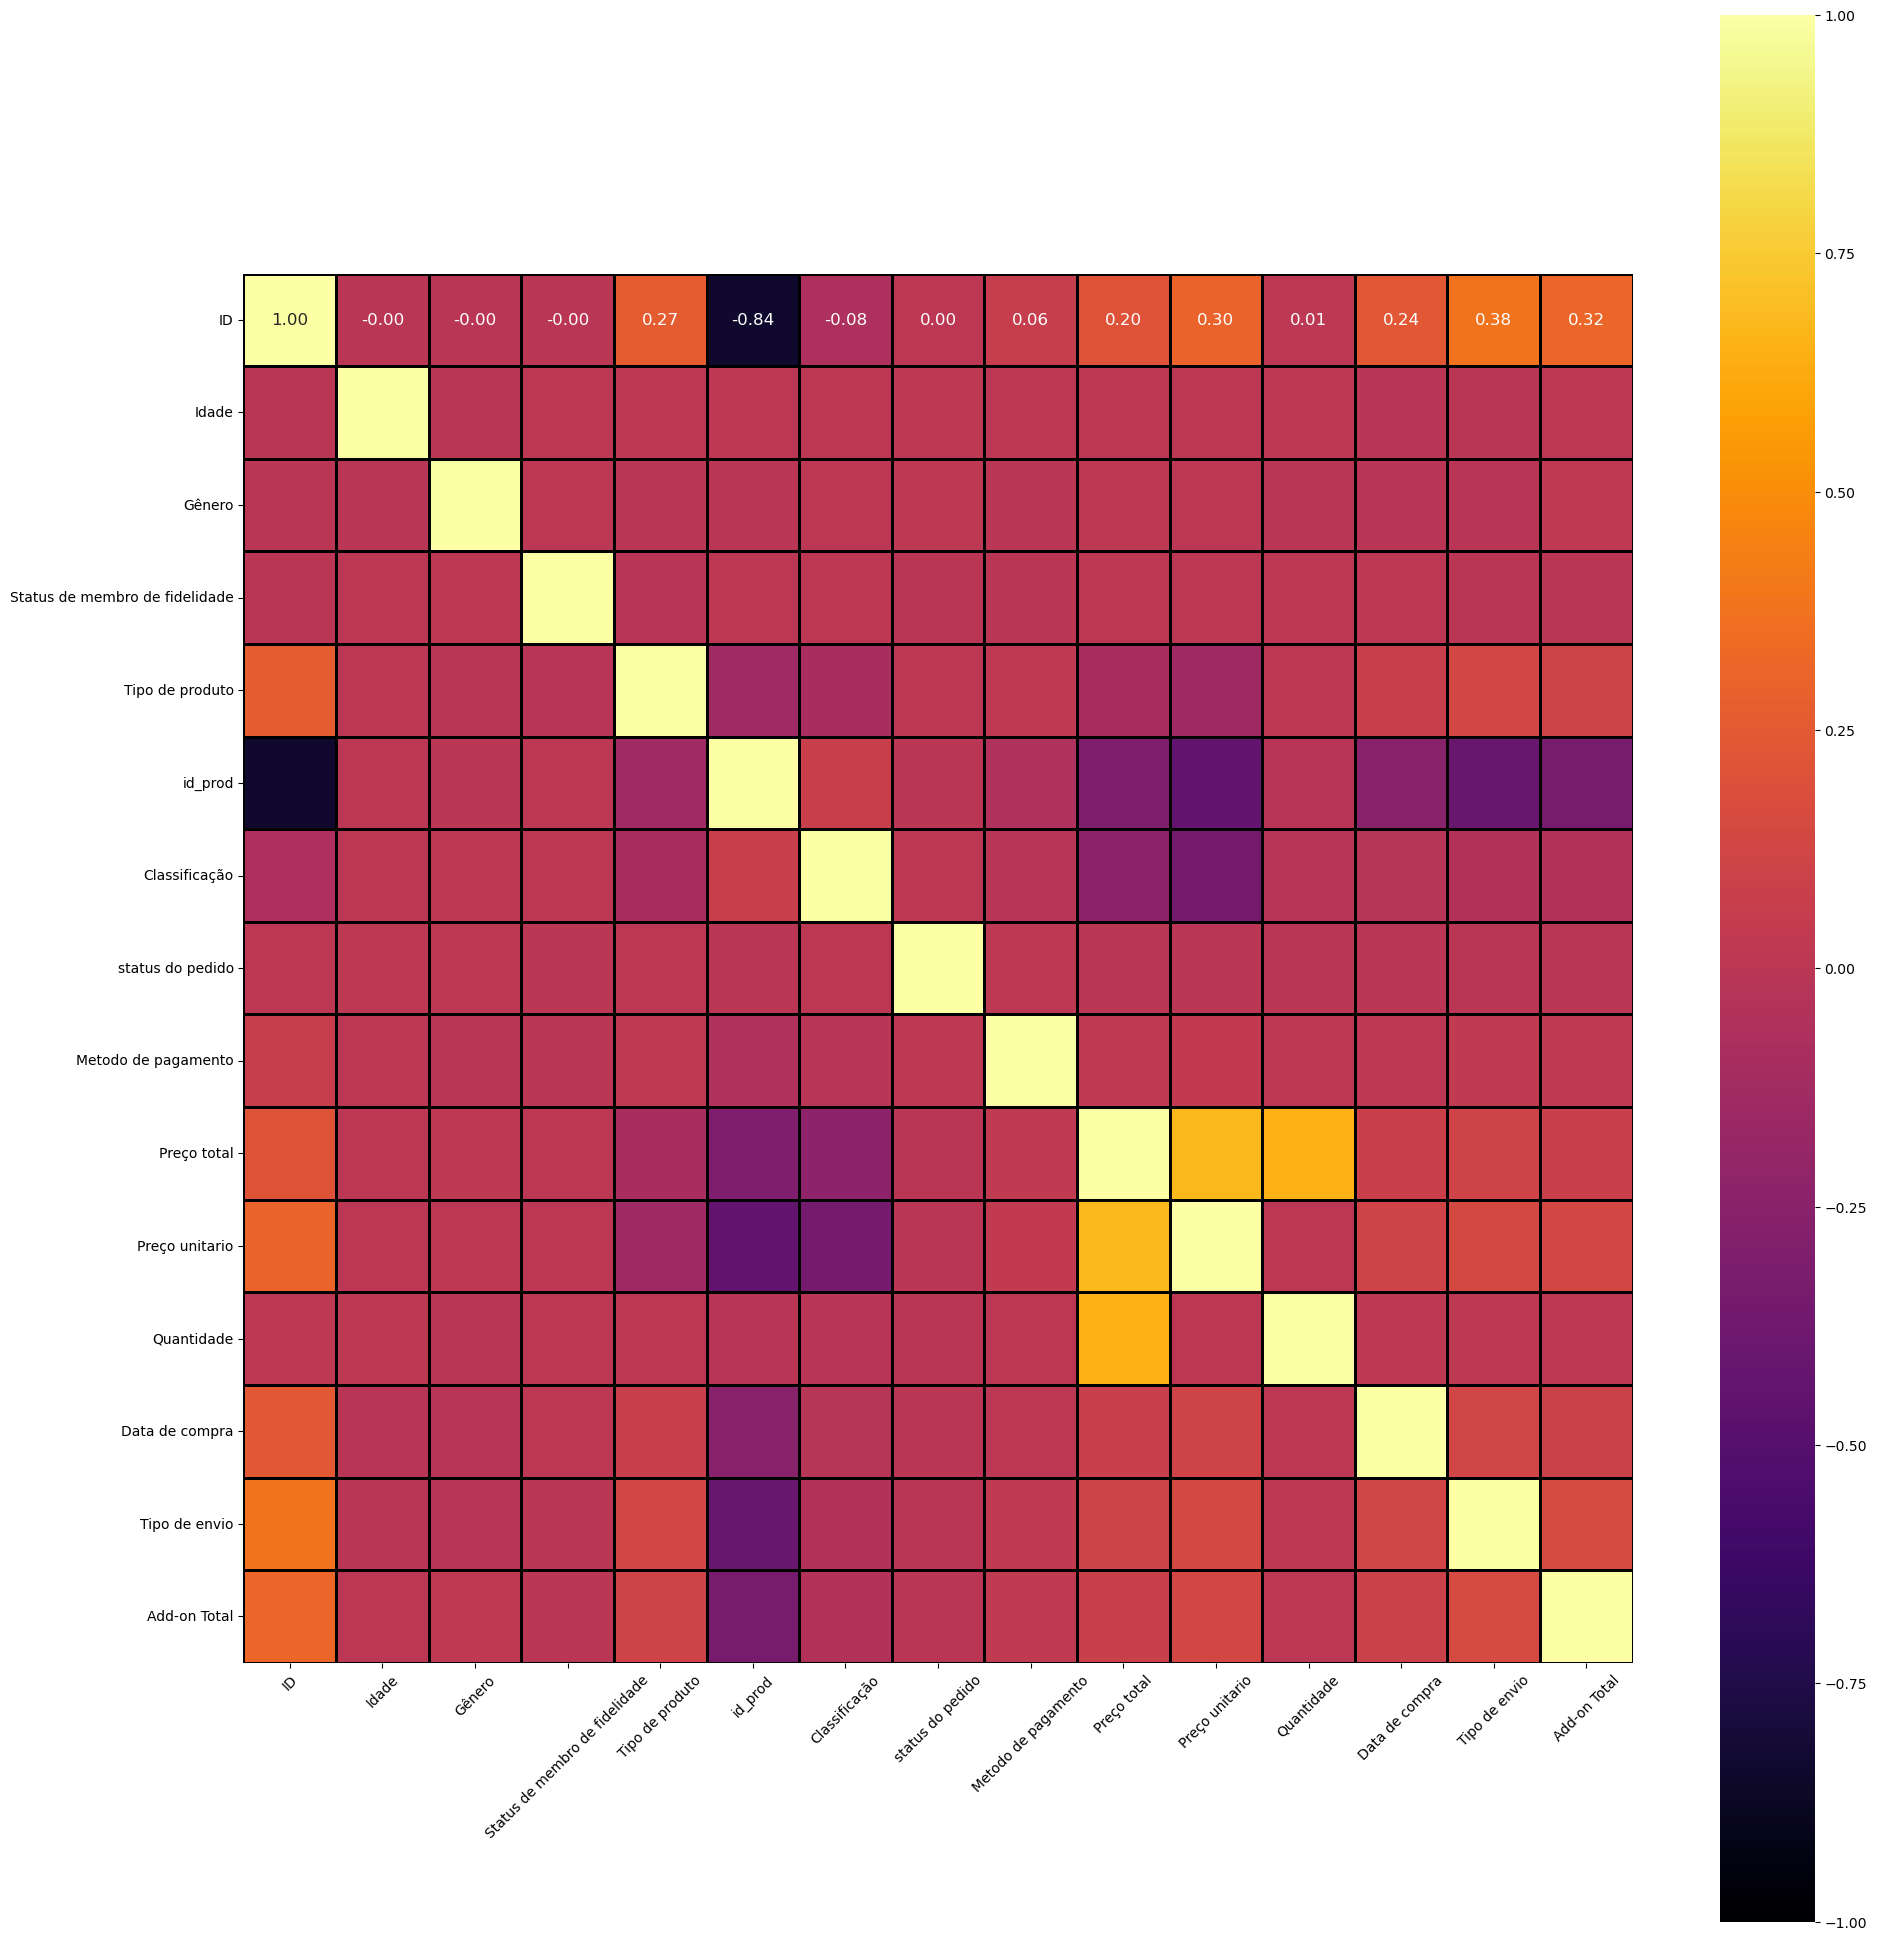

In [85]:
plt.subplots(figsize=(20, 20));
sns.heatmap(corr, vmax=1,vmin=-1,center=0, linewidths=0.8, linecolor='black',cmap='inferno',annot=True ,square=True ,fmt=".2f", annot_kws={'size':12});
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2);
plt.xticks(rotation=45);
plt.tight_layout();

### idade

In [86]:
fig=px.box(df_new,y='Idade')
fig.show()

c:\Users\nickg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



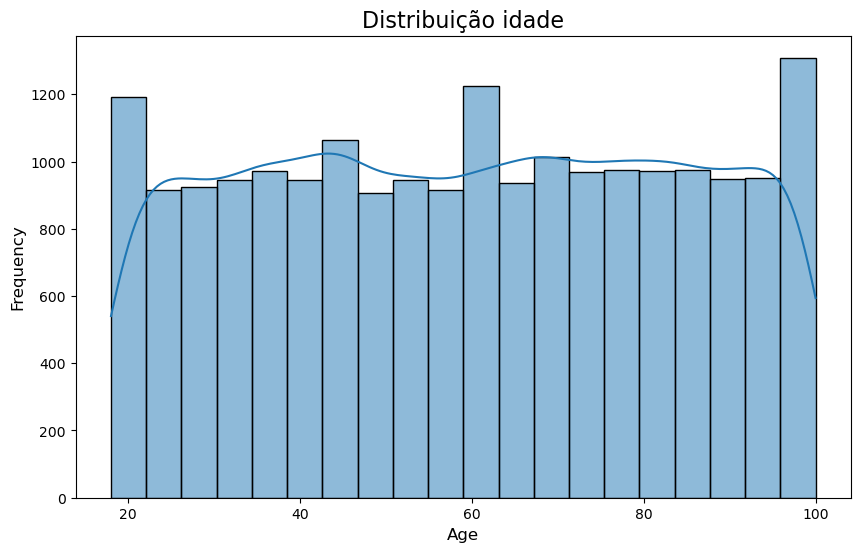

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df_eletric['Idade'], bins=20, kde=True)
plt.title('Distribuição idade', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show();

### Gênero

In [88]:
df_new['Gênero'] = df_new['Gênero'].map({2:'mulher', 1:'homem'})
fig=px.pie(df_new,names='Gênero',title="Distribução de sexo", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

c:\Users\nickg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



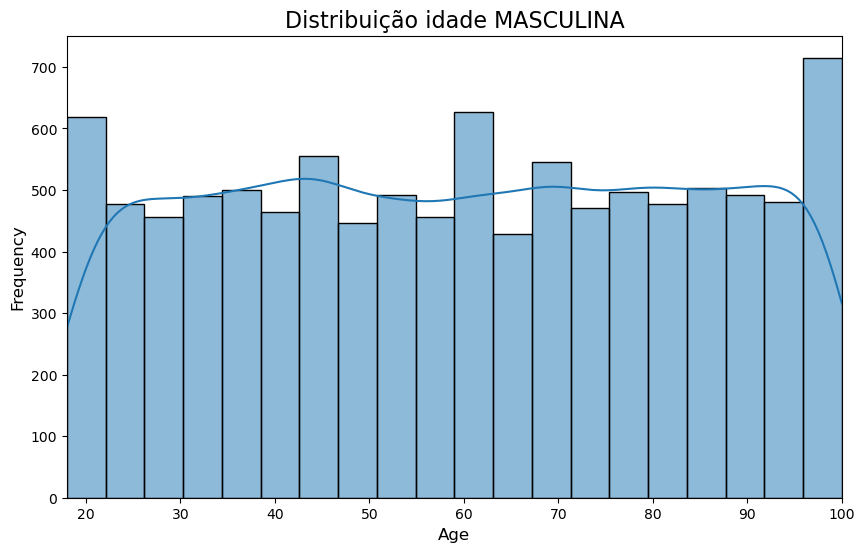

In [89]:
df_masculino = df_eletric[df_eletric['Gênero']== 1]
plt.figure(figsize=(10, 6))
sns.histplot(df_masculino['Idade'], bins=20, kde=True)
plt.title('Distribuição idade MASCULINA', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xlim(18, 100)
plt.ylabel('Frequency', fontsize=12)
plt.show();

c:\Users\nickg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



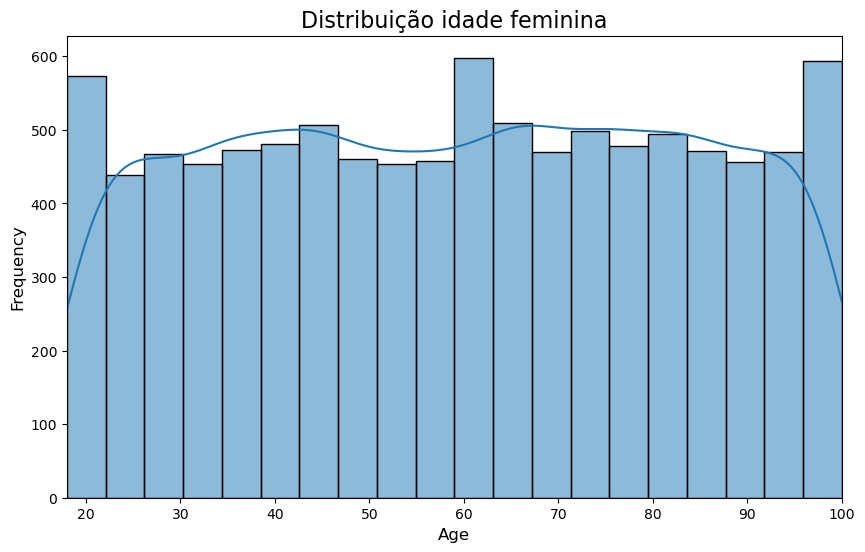

In [90]:
df_FEMININO = df_eletric[df_eletric['Gênero']== 2]
plt.figure(figsize=(10, 6))
sns.histplot(df_FEMININO['Idade'], bins=20, kde=True)
plt.title('Distribuição idade feminina', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xlim(18, 100)
plt.ylabel('Frequency', fontsize=12)
plt.show();

In [91]:
fig=px.box(df_masculino['Idade'])
fig.show()


In [92]:
fig=px.box(df_FEMININO['Idade'])
fig.show()

### Status de membro de fidelidade

In [93]:
df_new['Status de membro de fidelidade'] = df_new['Status de membro de fidelidade'].map({0:'Sem Fidelidade', 1:'Possui Fidelidade'})
fig=px.pie(df_new,names='Status de membro de fidelidade',title="Distribução de fidelidade", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

C:\Users\nickg\AppData\Local\Temp\ipykernel_11868\33644481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



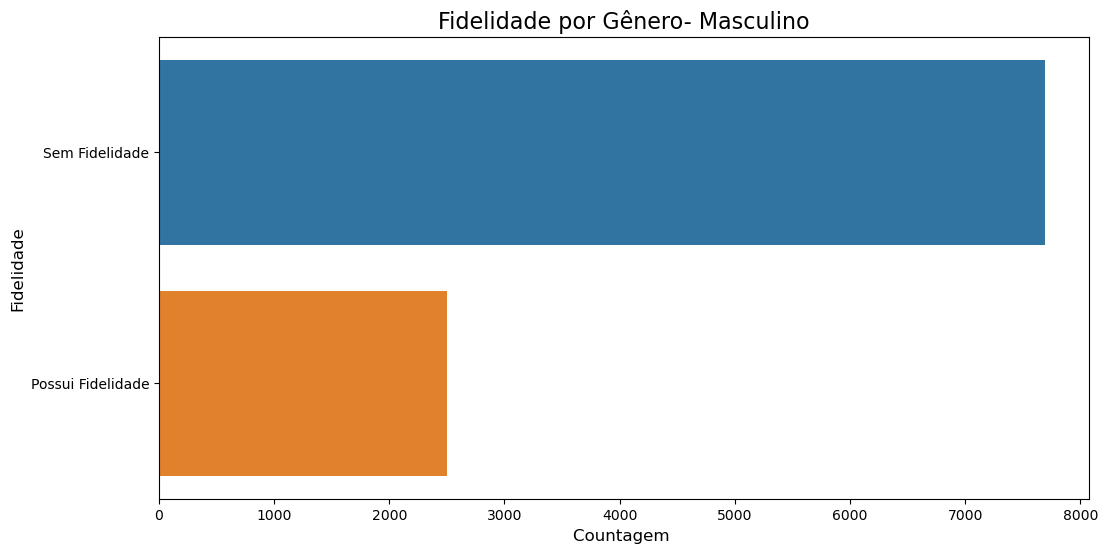

In [94]:
df_masculino['Status de membro de fidelidade'] = df_masculino['Status de membro de fidelidade'].map({0:'Sem Fidelidade', 1:'Possui Fidelidade'})

plt.figure(figsize=(12, 6))
sns.countplot(data=df_masculino, y="Status de membro de fidelidade", order=df_masculino["Status de membro de fidelidade"].value_counts().index)
plt.title('Fidelidade por Gênero- Masculino', fontsize=16)
plt.xlabel('Countagem ', fontsize=12)
plt.ylabel('Fidelidade', fontsize=12)
plt.show()

In [95]:
x=pd.value_counts(df_masculino["Status de membro de fidelidade"]=="Possui Fidelidade")
print(x)

Status de membro de fidelidade
False    7690
True     2504
Name: count, dtype: int64


C:\Users\nickg\AppData\Local\Temp\ipykernel_11868\4189545443.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



-----------------------------------------------------

C:\Users\nickg\AppData\Local\Temp\ipykernel_11868\3573238762.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



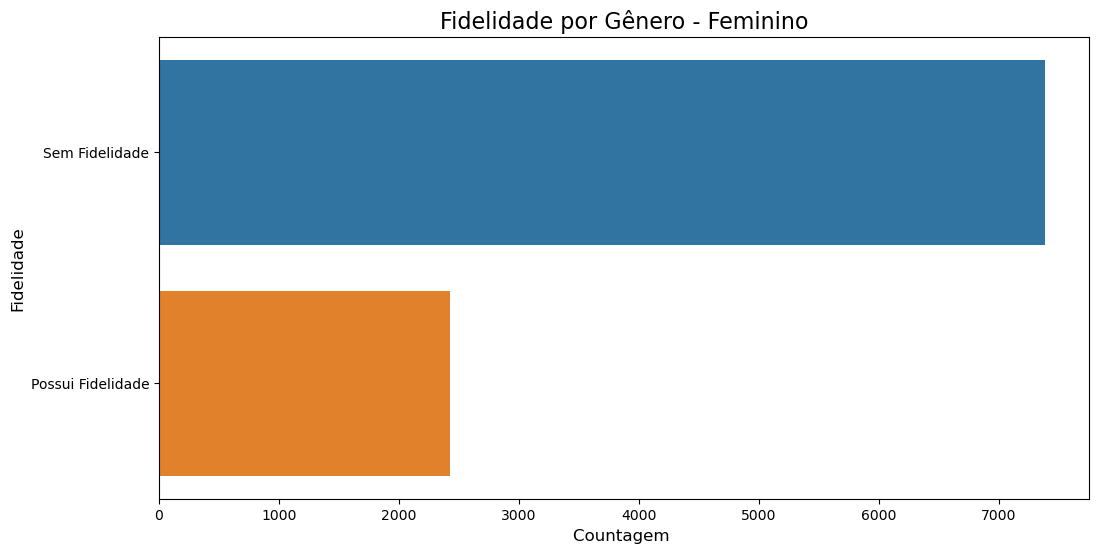

In [96]:
df_FEMININO['Status de membro de fidelidade'] = df_FEMININO['Status de membro de fidelidade'].map({0:'Sem Fidelidade', 1:'Possui Fidelidade'})

plt.figure(figsize=(12, 6))
sns.countplot(data=df_FEMININO, y="Status de membro de fidelidade", order=df_FEMININO["Status de membro de fidelidade"].value_counts().index)
plt.title('Fidelidade por Gênero - Feminino', fontsize=16)
plt.xlabel('Countagem ', fontsize=12)
plt.ylabel('Fidelidade', fontsize=12)
plt.show()

In [97]:

x=pd.value_counts(df_FEMININO["Status de membro de fidelidade"]=="Possui Fidelidade")
print(x)

Status de membro de fidelidade
False    7381
True     2425
Name: count, dtype: int64


C:\Users\nickg\AppData\Local\Temp\ipykernel_11868\687236053.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



### Datação

In [98]:
df_new["Data mensal"]=df_new["Data de compra"].dt.to_period('M')

In [99]:
df_new["Data anual"]=df_new["Data de compra"].dt.to_period('Y')

In [100]:
df_new.tail(3)

,ID,Idade,Gênero,Status de membro de fidelidade,Tipo de produto,id_prod,Classificação,status do pedido,Metodo de pagamento,Preço total,Preço unitario,Quantidade,Data de compra,Tipo de envio,Add-on Total,Data mensal,Data anual
19997,19996,75,mulher,Sem Fidelidade,5,456,4,2,5,1805.90,361.18,5,2024-08-26,1,198.98,2024-08,2024
19998,19997,72,homem,Sem Fidelidade,5,456,1,0,5,2528.26,361.18,7,2024-01-06,5,101.34,2024-01,2024
19999,19998,55,homem,Sem Fidelidade,3,123,4,2,5,674.32,674.32,1,2024-01-29,5,0.00,2024-01,2024


In [101]:
df_new["Data anual"].unique()

<PeriodArray>
['2024', '2023']
Length: 2, dtype: period[A-DEC]

In [102]:
x=pd.value_counts(df_new["Data anual"]=="2023")
print(x)

Data anual
False    17302
True      2698
Name: count, dtype: int64


C:\Users\nickg\AppData\Local\Temp\ipykernel_11868\903917816.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



In [103]:
x=pd.value_counts(df_new["Data anual"]=="2024")
print(x)

Data anual
True     17302
False     2698
Name: count, dtype: int64


C:\Users\nickg\AppData\Local\Temp\ipykernel_11868\3916906672.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



c:\Users\nickg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\nickg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



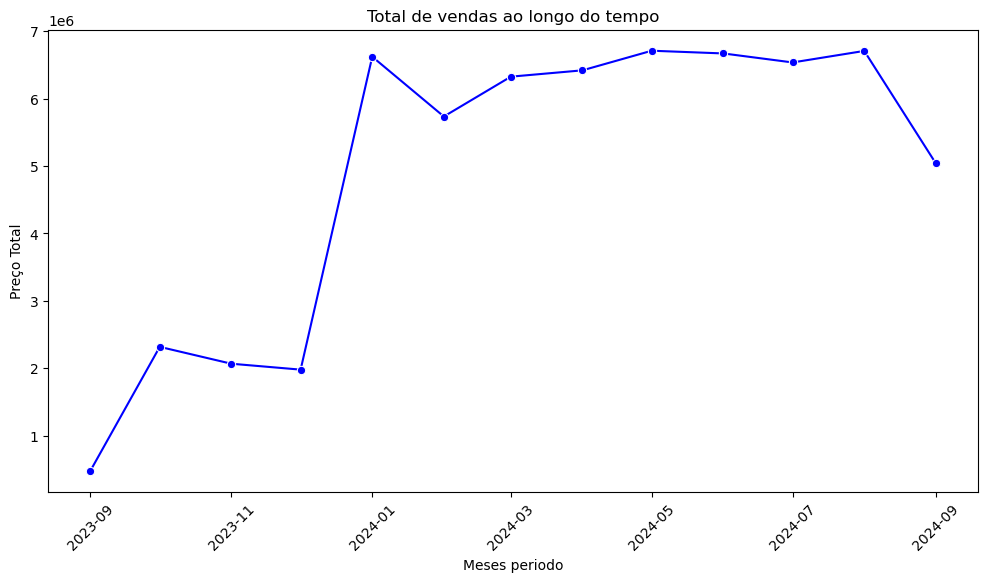

In [104]:
monthly_sales = df_new.groupby('Data mensal')['Preço total'].sum().reset_index()
monthly_sales['Data mensal'] = monthly_sales['Data mensal'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data mensal', y='Preço total', data=monthly_sales, marker='o', color='b')
plt.title('Total de vendas ao longo do tempo')
plt.xlabel('Meses periodo')
plt.ylabel('Preço Total')
plt.xticks(rotation=45)
plt.show()


### Metodo de pagamento

In [105]:
df_new["Metodo de pagamento"] = df_new["Metodo de pagamento"].map({1:'Crédito',2:'Paypal',3:'Dinheiro',4:'Débito',5:'Trânsferência bancária'})


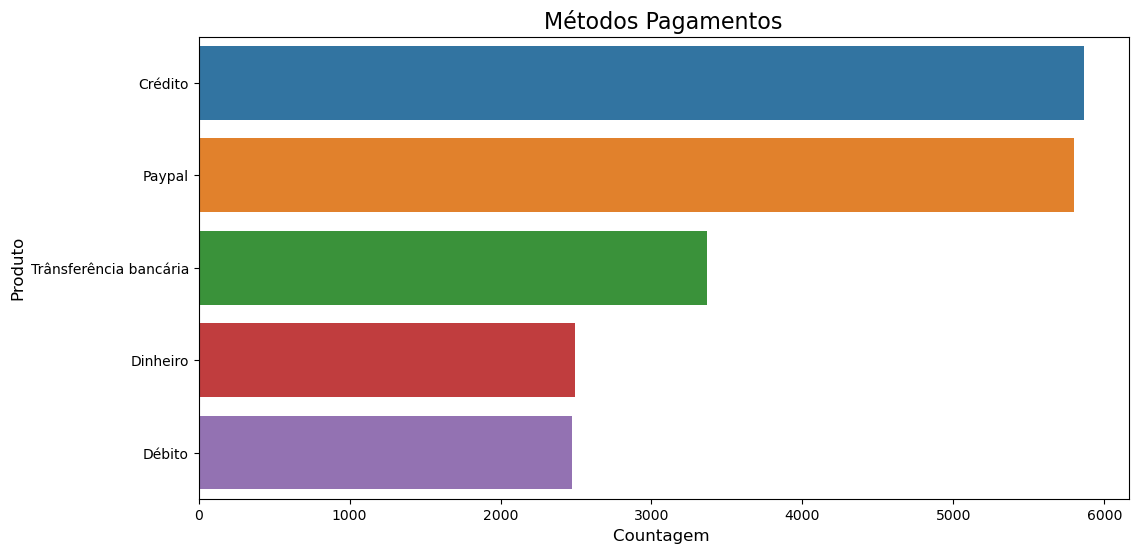

In [106]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_new, y="Metodo de pagamento", order=df_new["Metodo de pagamento"].value_counts().index)
plt.title('Métodos Pagamentos', fontsize=16)
plt.xlabel('Countagem ', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.show()

In [107]:
fig = px.violin(df_new, "Metodo de pagamento", "Preço total",)
fig.show()

### Classificação

In [108]:
fig=px.histogram(df_new, df_new["Classificação"],)
fig.show()

In [109]:
df_2024=df_new[df_new['Data anual']=="2024"]
fig=px.histogram(df_2024, df_2024["Classificação"])
fig.show()

In [110]:
df_2023=df_new[df_new['Data anual']=="2023"]
fig=px.histogram(df_2023, df_2023["Classificação"])

fig.show()

### Status do pedido


### Preço total






### Preço unitário

### Quantidade

### Tipo de envio

### Total de complementos

## Conclusão

Depois de analisar os dados end to end